In [8]:
import os

Read data

In [37]:
l = []
for r in range(100):
    div_file = "../divergence/Pantherophis_guttatus.{}.tab.gz".format(r)
    statinfo = os.stat(div_file)
    if statinfo.st_size < 50:
        continue
    df = pd.read_csv(div_file, sep="\t", header=None)
    df.columns = ["ref", "sp", "diffs", "substrate", "div", "scaf", "start", "ref2", "rep"]
    l.append(df)

div = pd.concat(l)
div = div[~div.sp.str.contains("Anc")].reset_index(drop=True)

In [38]:
sex_scafs = ['Super_scaffold_14','Super_scaffold_15','Super_scaffold_205','Super_scaffold_235','Super_scaffold_286','Super_scaffold_312','Super_scaffold_343','Super_scaffold_361','Super_scaffold_367','Super_scaffold_375','Super_scaffold_410','Super_scaffold_414','Super_scaffold_430','Super_scaffold_437','Super_scaffold_466','Super_scaffold_54','Super_scaffold_8']
div["ctype"] = ["Z" if scaf in sex_scafs else "A" for scaf in div.scaf]

Plot divergence

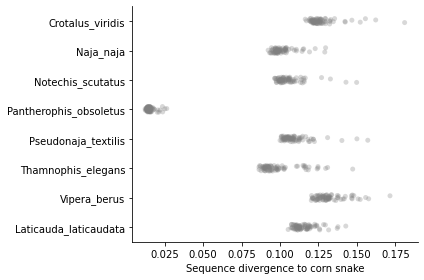

In [61]:
f,ax = plt.subplots(figsize=[6,4])

subd = div[(div["substrate"]>2e6) 
           & (div.ctype!="Z") 
           & (div.sp!="Pantherophis_guttatus")]

means = subd.groupby("sp")["div"].mean().to_dict()

sns.stripplot(data=subd, 
              x="div", 
              y="sp", 
              alpha = 0.3, 
              color="gray")

ax.set_xlabel("Sequence divergence to corn snake")
ax.set_ylabel("")
sns.despine()
plt.tight_layout()
plt.savefig("corn_snake_divergence_10Mb.pdf")

In [62]:
subd.groupby("sp")["div"].median().reset_index()

,sp,div
0,Crotalus_viridis,0.124534
1,Laticauda_laticaudata,0.113348
2,Naja_naja,0.099085
3,Notechis_scutatus,0.103399
4,Pantherophis_obsoletus,0.014970
5,Pseudonaja_textilis,0.107366
6,Thamnophis_elegans,0.094488
7,Vipera_berus,0.130154
